# Predict Stock Price For Netflix 
Data from 2-5-2018 to 2-4-2022

Data set link https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data

Data set have 1009 rows , 7 columns

This model created by `Youssef Mustafa`

## Import libarary

In [4]:
# Numpy to create data as array
import numpy as np
# Pandas to Get data and develop it
import pandas as pd
# Matplotlib to vis data
import matplotlib.pyplot as plt
# Split data into train and test
from sklearn.model_selection import train_test_split
# Linear regression model
from sklearn.linear_model import LinearRegression
# Evaluate Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import datetime


### Read dataset and print first 5 rows

In [5]:
# Read dataset 
df = pd.read_csv('Dataset/NFLX.csv')
# Print First 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
# Create copy of dataset to visualize it 
viz = df.copy()

In [7]:
# Check if there null cell or not
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Print shape of dataset (Number of rows, columns) 
df.shape

(1009, 7)

In [9]:
# Prnit data info like column and number of rows of each column and if it null or not and data type of it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
# Print data describtion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


### Split Dataset

In [11]:
# split data into train and test set with 20% to test and 80% of train
train, test = train_test_split(df, test_size = 0.2)

In [12]:
test_pred = test.copy()

In [13]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
791,3/29/2021,505.660004,518.000000,504.399994,513.950012,513.950012,3330000
142,8/28/2018,367.230011,369.989990,360.380005,368.489990,368.489990,9222600
408,9/19/2019,291.559998,293.809998,283.399994,286.600006,286.600006,8461300
637,8/17/2020,484.190002,486.239990,479.100006,482.350006,482.350006,2423500
261,2/20/2019,364.850006,366.709991,356.700012,359.910004,359.910004,8110700
658,9/16/2020,499.989990,504.660004,483.309998,483.859985,483.859985,4394900
825,5/17/2021,485.589996,492.709991,482.809998,488.940002,488.940002,2705200
458,11/29/2019,315.779999,316.619995,313.339996,314.660004,314.660004,2411700
946,11/5/2021,663.969971,665.640015,645.010010,645.719971,645.719971,5277400
102,7/2/2018,385.450012,398.380005,380.000000,398.179993,398.179993,8142500


In [14]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
538,3/26/2020,344.000000,363.839996,341.730011,362.989990,362.989990,7229600
515,2/24/2020,364.760010,372.820007,361.000000,368.700012,368.700012,6936400
948,11/9/2021,653.700012,660.500000,650.520020,655.989990,655.989990,2415600
374,8/1/2019,324.250000,328.579987,318.739990,319.500000,319.500000,6563200
884,8/10/2021,520.000000,520.789978,512.969971,515.840027,515.840027,1960500
477,12/27/2019,332.959991,333.820007,326.010010,329.089996,329.089996,5036100
696,11/9/2020,485.540009,495.850006,467.260010,470.500000,470.500000,10419700
175,10/15/2018,337.630005,339.209991,326.929993,333.130005,333.130005,11215000
255,2/11/2019,350.000000,352.869995,344.809998,345.730011,345.730011,5454900
86,6/8/2018,358.059998,362.390015,356.250000,360.570007,360.570007,5225700


In [15]:
# x Train and test with 4 column (Open, High, Low, Volum), Drop (Date, Adj Close, Close(Prediction))
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [16]:
# Create y train and test with close columns
y_train = train['Close'].values
y_test = test['Close'].values

### Create Linear Regression Model

In [17]:
# Set Linear Regression model with name (model_lnr)
model_lnr = LinearRegression()
# Fit Training data
model_lnr.fit(x_train, y_train)

LinearRegression()

In [18]:
# Predict Data with x_test
y_pred = model_lnr.predict(x_test)

In [19]:
# Test Model
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.30383309]


### Model Evalution (model accuracy will be)

In [20]:
# Get accuracy of model
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 18.053
RMSE 4.249
MAE 2.979
MAPE 0.007
R2 Score :  0.998


### Model Visualization

In [21]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [22]:
viz['Date'] = pd.to_datetime(viz['Date'], format='%m/%d/%Y')

In [23]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


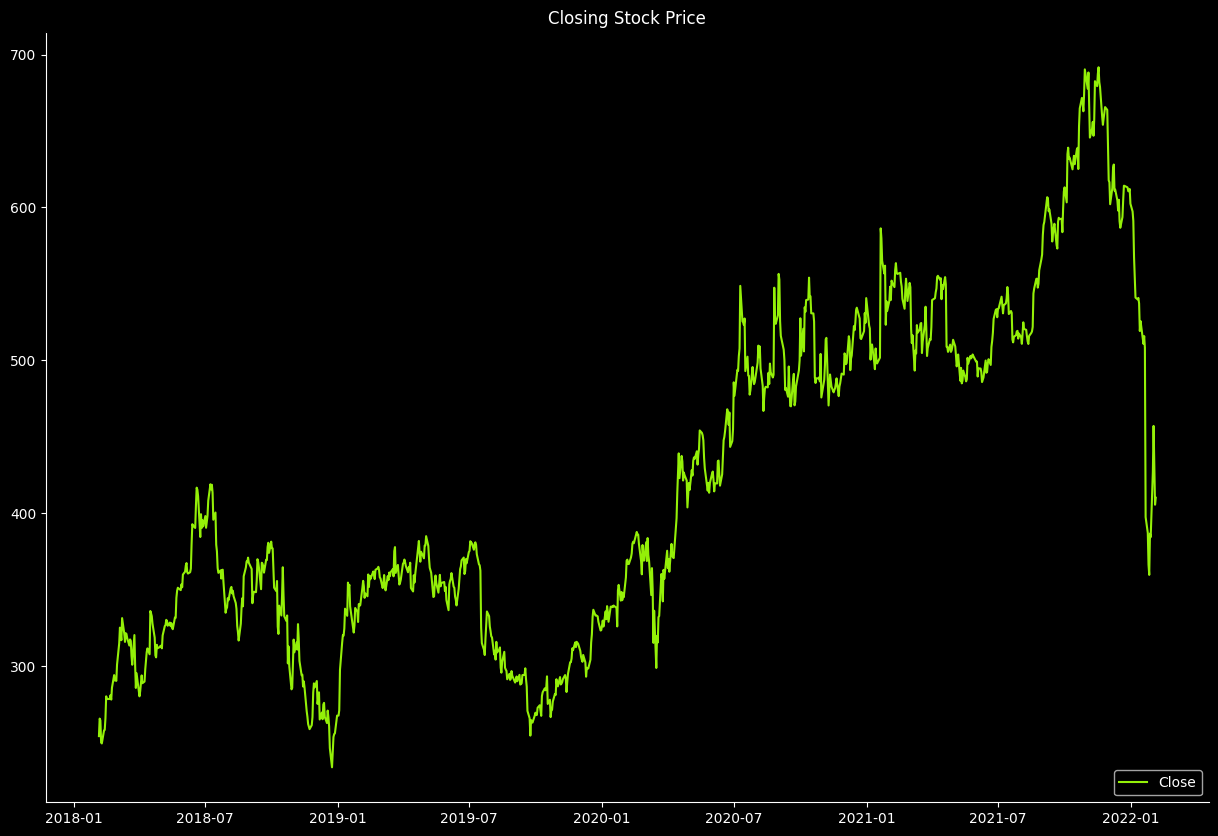

In [24]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

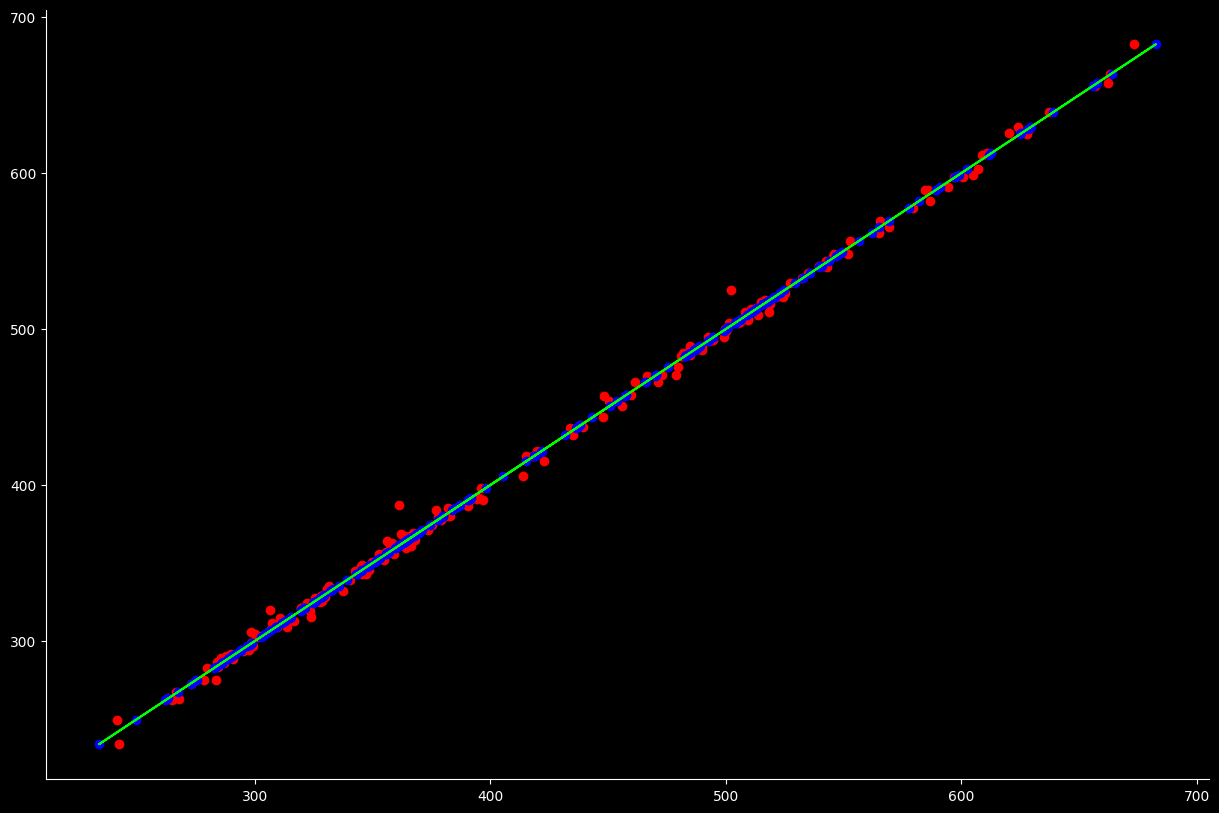

In [25]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [26]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
538,3/26/2020,344.000000,363.839996,341.730011,362.989990,362.989990,7229600,358.130659
515,2/24/2020,364.760010,372.820007,361.000000,368.700012,368.700012,6936400,368.487594
948,11/9/2021,653.700012,660.500000,650.520020,655.989990,655.989990,2415600,656.895091
374,8/1/2019,324.250000,328.579987,318.739990,319.500000,319.500000,6563200,323.538433
884,8/10/2021,520.000000,520.789978,512.969971,515.840027,515.840027,1960500,515.117769
...,...,...,...,...,...,...,...,...
899,8/31/2021,566.119995,569.479980,561.609985,569.190002,569.190002,2431900,565.443514
168,10/4/2018,375.880005,375.920013,360.399994,363.649994,363.649994,9074400,363.567824
312,5/3/2019,381.529999,385.029999,378.269989,385.029999,385.029999,5130300,382.044245
660,9/18/2020,472.510010,479.399994,458.600006,469.959991,469.959991,6717700,466.773686


In [27]:
test_pred[['Close', 'Close_Prediction']].describe().T


,count,mean,std,min,25%,50%,75%,max
Close,202.0,421.154207,107.239493,233.880005,332.197502,386.925003,508.277512,682.609985
Close_Prediction,202.0,421.104360,107.255886,241.500733,330.700553,386.613925,509.075823,673.582612


In [28]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%m/%d/%Y')

In [29]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-09,249.470001,241.500733
2018-02-10,NaN,NaN
2018-02-11,NaN,NaN
2018-02-12,NaN,NaN
2018-02-13,NaN,NaN
...,...,...
2022-01-30,NaN,NaN
2022-01-31,NaN,NaN
2022-02-01,457.130005,448.181195


In [30]:
output.to_csv('Dataset/Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


In [31]:
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = np.array([open_price, high_price, low_price, volume]).reshape(1, -1)
    predicted_price = model_lnr.predict(input_data)
    return predicted_price[0]

In [33]:
# User input
user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))

# Predict using user input
predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
print(f"Predicted Close Price: {predicted_stock_price}")


Predicted Close Price: 403.2346945854642
